In [1]:
!pip install -q split-folders

In [2]:
import os
import pandas as pd
import numpy as np
import zipfile
import splitfolders 
import time

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

import tensorflow as tf
import keras
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import  MobileNetV2, ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_input_resnet50
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_input_vgg16
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_input_mobilenetv2

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
!ls -ltr gdrive/MyDrive

total 73681
-rw------- 1 root root   18885 Mar 20  2015  train.csv
-rw------- 1 root root 2565280 Dec 10  2019  test.csv.zip
-rw------- 1 root root    4650 Dec 10  2019  train.csv.zip
-rw------- 1 root root    8988 Aug 20  2020 'KYS 2020-2022.xlsx'
-rw------- 1 root root     151 Aug 21  2020 'KYS 2020-2022.gsheet'
-rw------- 1 root root     151 Aug 31  2020  KYS.gsheet
-rw------- 1 root root     151 Sep  2  2020 'Survey 2.0.gform'
-rw------- 1 root root   86757 Sep  3  2020  015004_AyushJain_Resume.pdf
-rw------- 1 root root     151 Sep  5  2020 'Survey 2.0 (Responses).gsheet'
-rw------- 1 root root     151 Sep  5  2020 'Professional profile.gslides'
-rw------- 1 root root     151 Sep  6  2020 'Pitch - Pie chart 1.gsheet'
-rw------- 1 root root     151 Sep  6  2020 'Ayush Jain_Total.gslides'
-rw------- 1 root root   30708 Sep  8  2020  Sample_Fresher.docx
-rw------- 1 root root   41579 Sep  8  2020  Sample_Experienced.docx
-rw------- 1 root root     151 Sep  9  2020 'Sample_Experienced

In [5]:
!ls /content/gdrive/MyDrive/flowers


daisy  dandelion  rose	sunflower  tulip


In [6]:
splitfolders.ratio("/content/gdrive/MyDrive/flowers", output="output", seed=100, ratio=(.8, .1, .1), group_prefix=None) 

Copying files: 4317 files [00:10, 396.33 files/s]


In [7]:
!ls ./output

test  train  val


In [8]:
daisy_dir = os.path.join('./output/train/daisy')
dandelion_dir = os.path.join('./output/train/dandelion')
rose_dir = os.path.join('./output/train/rose')
sunflower_dir = os.path.join('./output/train/sunflower')
tulip_dir = os.path.join('./output/train/tulip')


print('Total training Daisy images :',len(os.listdir(daisy_dir)))
print('Total training Dandelion images :',len(os.listdir(dandelion_dir)))
print('Total training Rose images :',len(os.listdir(rose_dir)))
print('Total training Sunflower images :',len(os.listdir(sunflower_dir)))
print('Total training Tulip images :',len(os.listdir(tulip_dir)))

print('\n')
daisy_files = os.listdir(daisy_dir)
dandelion_files = os.listdir(dandelion_dir)
rose_files = os.listdir(rose_dir)
sunflower_files = os.listdir(sunflower_dir)
tulip_files = os.listdir(tulip_dir)

print("Total len of training images",len(daisy_files+dandelion_files+rose_files+sunflower_files+tulip_files))


Total training Daisy images : 611
Total training Dandelion images : 841
Total training Rose images : 627
Total training Sunflower images : 586
Total training Tulip images : 787


Total len of training images 3452


In [9]:
print('Total Test Daisy images :',len(os.listdir('output/test/daisy')))
print('Total Test Dandelion images :',len(os.listdir('output/test/dandelion')))
print('Total Test Rose images :',len(os.listdir('output/test/rose')))
print('Total Test Sunflower images :',len(os.listdir('output/test/sunflower')))
print('Total Test Tulip images :',len(os.listdir('output/test/tulip')))

Total Test Daisy images : 77
Total Test Dandelion images : 106
Total Test Rose images : 79
Total Test Sunflower images : 74
Total Test Tulip images : 99


In [10]:
pic_index = 10

#get paths for some of the immages from each folder
daisy_fewimg = [os.path.join(daisy_dir,fname) for fname in daisy_files[pic_index-10:pic_index]]
dandelion_fewimg = [os.path.join(dandelion_dir,fname) for fname in dandelion_files[pic_index-10:pic_index]]
rose_fewimg = [os.path.join(rose_dir,fname) for fname in rose_files[pic_index-10:pic_index]]
sunflower_fewimg = [os.path.join(sunflower_dir,fname) for fname in sunflower_files[pic_index-10:pic_index]]
tulip_fewimg = [os.path.join(tulip_dir,fname) for fname in tulip_files[pic_index-10:pic_index]]

(240, 162, 3)


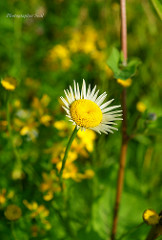

In [11]:
import PIL.Image as Image

print(cv2.imread(daisy_fewimg[0]).shape)
Image.open(daisy_fewimg[0])

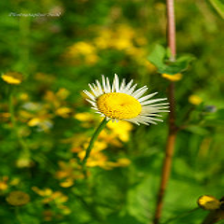

In [12]:
Image.open(daisy_fewimg[0]).resize((224,224))

In [13]:
def cvtRGB(img):
    return cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)

In [14]:
def plot_img(imgpath_list):

  fig, ax = plt.subplots(3,3,figsize=(10,10))
  k = 0
  for j in range(3):
    for i in range(3):
        img = cv2.resize(cv2.imread(imgpath_list[k]),(224,224))
        k=k+1
        ax[i,j].imshow(cvtRGB(img));
        ax[i,j].axis('off');

				Daisy


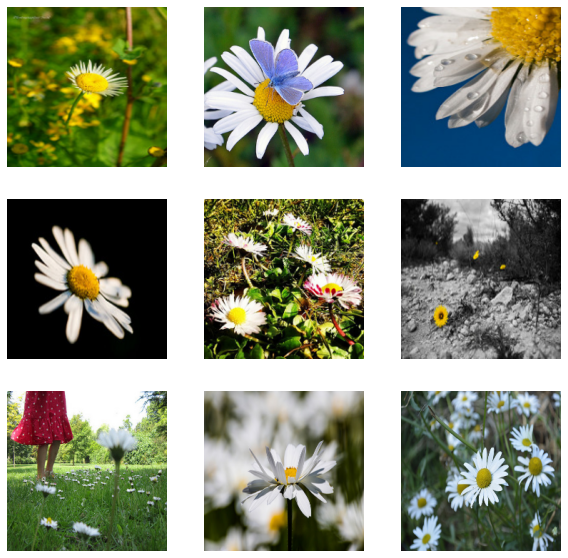

In [15]:
print('\t\t\t\tDaisy')
plot_img(daisy_fewimg)

				Dadelion


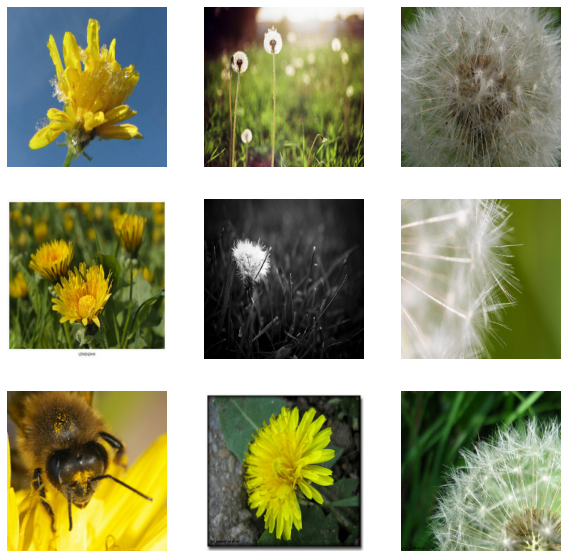

In [16]:
print('\t\t\t\tDadelion')
plot_img(dandelion_fewimg)

				Rose


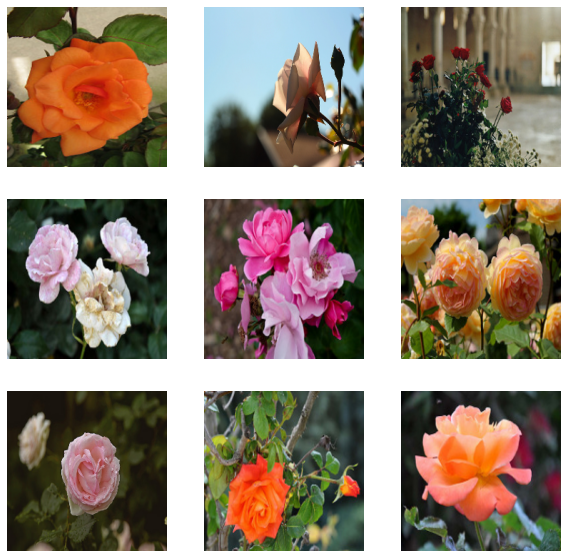

In [17]:
print('\t\t\t\tRose')
plot_img(rose_fewimg)

				Tulip


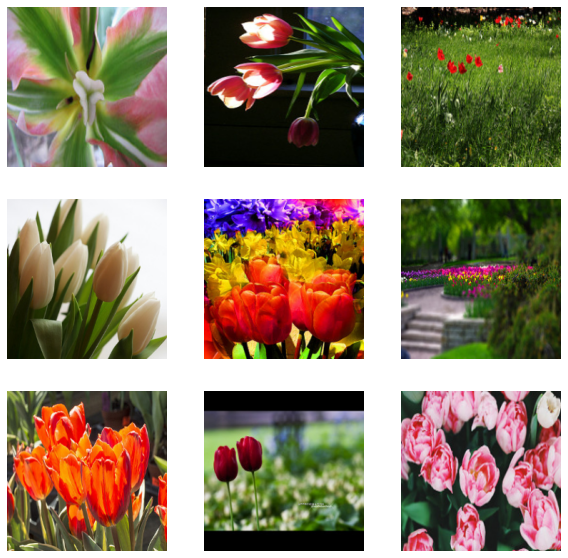

In [18]:
print('\t\t\t\tTulip')
plot_img(tulip_fewimg)

				Sunflower


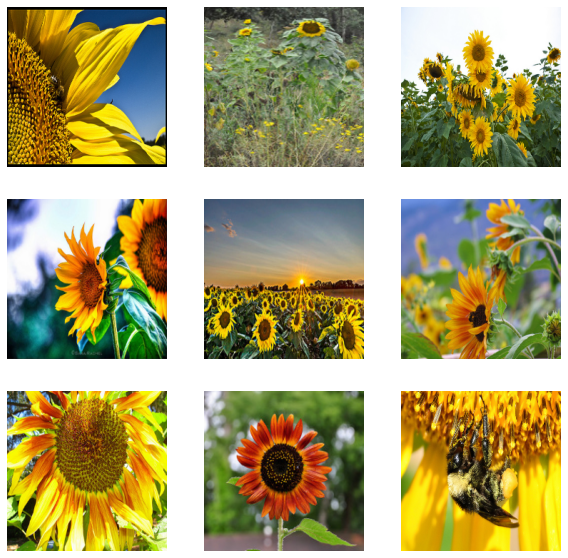

In [19]:
print('\t\t\t\tSunflower')
plot_img(sunflower_fewimg)

In [20]:
#image Augumentation using ImageDataGenerator on train data 
#Data augmentation is used to increase the size of training set and to get more different images
training_dir = './output/train/'
training_datagen = ImageDataGenerator(
    rescale = 1./255, #normalization
    rotation_range = 40,
    width_shift_range = 0.4,
    height_shift_range = 0.4,
    shear_range = 0.2,
    zoom_range = 0.1,
    fill_mode = 'nearest',
    horizontal_flip = True)

In [21]:
#do not perform augmentation on validation and test data/validation set ,this might mislead the results
validation_dir = './output/val'
validation_datagen = ImageDataGenerator(
    rescale=1./255
)

test_dir = './output/test'
test_datagen = ImageDataGenerator(
    rescale=1./255
)

In [22]:
#flow_from_directory() method allows you to read the images directly from the directory and augment them while the neural network model is learning on the training data.
train_generator = training_datagen.flow_from_directory(
    training_dir,
    target_size = (224,224), #rescale images to fixed size
    class_mode = 'categorical',
    batch_size = 32
)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (224,224),
    class_mode = 'categorical',
    batch_size = 32
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224,224),
    class_mode = 'categorical',
    batch_size = 32
)

Found 3452 images belonging to 5 classes.
Found 430 images belonging to 5 classes.
Found 435 images belonging to 5 classes.


In [23]:
# Build CNN sequential model and train from scratch 
def model_from_scratch():
  #Build model
  model = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (224,224,3)),
              tf.keras.layers.MaxPool2D(2,2),
              tf.keras.layers.Dropout(0.5),
              tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
              tf.keras.layers.MaxPool2D(2,2),
              tf.keras.layers.Dropout(0.5),
              tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
              tf.keras.layers.MaxPool2D(2,2),
              tf.keras.layers.Dropout(0.5),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dropout(0.5),
              tf.keras.layers.Dense(512, activation = 'relu'),
              tf.keras.layers.Dense(5, activation = 'softmax')
  ])

  #model compilation
  model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy']
            )
  
  return model

model_from_scratch().summary() #Model Summary

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       7

In [24]:
#fit model to train dataset 
epochs = 25
start = time.time()

model = model_from_scratch()
history1 = model.fit(train_generator,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=5,
                    verbose=2
                    )

end = time.time()
duration = end - start
print ('\n Model built from scratch training took %0.2f seconds (%0.1f minutes) to train for %d epochs'%(duration, duration/60, epochs) )

Epoch 1/25
108/108 - 51s - loss: 1.9403 - accuracy: 0.2752 - val_loss: 1.4612 - val_accuracy: 0.3438
Epoch 2/25
108/108 - 47s - loss: 1.4177 - accuracy: 0.3841 - val_loss: 1.3658 - val_accuracy: 0.4688
Epoch 3/25
108/108 - 47s - loss: 1.3426 - accuracy: 0.3983 - val_loss: 1.2815 - val_accuracy: 0.4437
Epoch 4/25
108/108 - 47s - loss: 1.2376 - accuracy: 0.4586 - val_loss: 1.1639 - val_accuracy: 0.4750
Epoch 5/25
108/108 - 47s - loss: 1.1976 - accuracy: 0.4751 - val_loss: 1.0961 - val_accuracy: 0.4938
Epoch 6/25
108/108 - 47s - loss: 1.1651 - accuracy: 0.5084 - val_loss: 1.0835 - val_accuracy: 0.5312
Epoch 7/25
108/108 - 47s - loss: 1.1242 - accuracy: 0.5397 - val_loss: 1.0471 - val_accuracy: 0.5625
Epoch 8/25
108/108 - 46s - loss: 1.0613 - accuracy: 0.5605 - val_loss: 0.9501 - val_accuracy: 0.5562
Epoch 9/25
108/108 - 47s - loss: 1.0493 - accuracy: 0.5762 - val_loss: 1.0221 - val_accuracy: 0.5312
Epoch 10/25
108/108 - 47s - loss: 1.0187 - accuracy: 0.5884 - val_loss: 0.9446 - val_accura

In [25]:
#function to get accuracy and loss from history 
def get_history_data(history):
    
  train_acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  train_loss = history.history['loss']
  val_loss = history.history['val_loss']

  return train_acc,val_acc,train_loss,val_loss

In [26]:
train_acc,val_acc,train_loss,val_loss = get_history_data(history1)

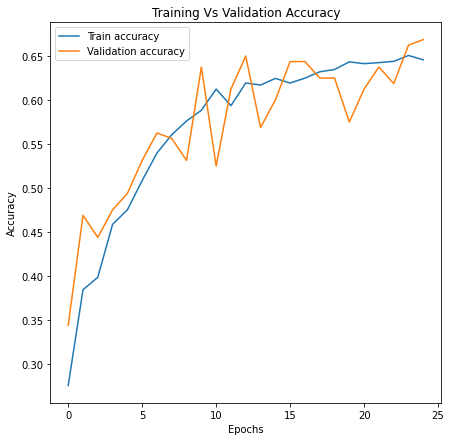

In [27]:
#plot Accuracy graph
epochs = range(len(train_acc))
plt.figure(figsize=(7,7));
plt.plot(epochs,train_acc,label ='Train accuracy');
plt.plot(epochs,val_acc,label ='Validation accuracy');
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend();
plt.title('Training Vs Validation Accuracy');

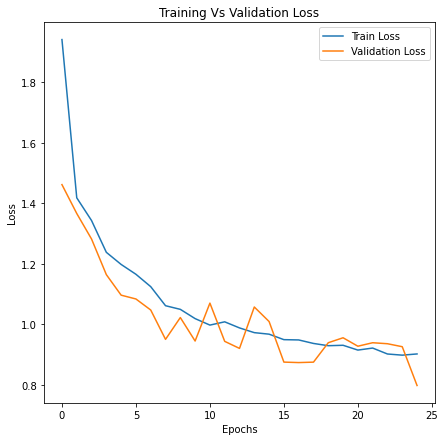

In [28]:
#plot validation graph
plt.figure(figsize=(7,7));
plt.plot(epochs,train_loss,label ='Train Loss');
plt.plot(epochs,val_loss,label ='Validation Loss');
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend();
plt.title('Training Vs Validation Loss');

In [29]:
model.save('./model_from_stratch.h5')

In [30]:
#check how model performs on test data(unseen data)
model.evaluate(test_generator)

14/14 [==============================] - 2s 150ms/step - loss: 0.8072 - accuracy: 0.7011


[0.8072271347045898, 0.7011494040489197]

In [31]:
#use VGG16 pre-trained model
def create_model_from_VGG16():
   
    model = VGG16(weights = "imagenet", include_top=False, input_shape = (224,224, 3))
    
    # don't train existing weights 
    for layer in model.layers:
      layer.trainable = False

    #Adding custom Layers 
    x = model.output
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(128, activation="relu")(x)
    #x = keras.layers.Dropout(0.5)(x)
    #x = keras.layers.Dense(1024, activation="relu")(x)
    predictions = keras.layers.Dense(5, activation="softmax")(x)
    
    # creating the final model 
    final_model = keras.models.Model(inputs = model.input, outputs = predictions)
    
    final_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
    
    return final_model

create_model_from_VGG16().summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [32]:
epochs = 10
start = time.time()

model_from_vgg16 = create_model_from_VGG16()
history2 = model_from_vgg16.fit(train_generator,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=5,
                    verbose=2
                     )

end = time.time()
duration = end - start
print ('\n model from trained with VGG16 took %0.2f seconds (%0.1f minutes) to train for %d epochs'%(duration, duration/60, epochs) )

Epoch 1/10
108/108 - 76s - loss: 1.2793 - accuracy: 0.5591 - val_loss: 0.7915 - val_accuracy: 0.7000
Epoch 2/10
108/108 - 56s - loss: 0.8166 - accuracy: 0.7022 - val_loss: 0.8589 - val_accuracy: 0.6625
Epoch 3/10
108/108 - 56s - loss: 0.7238 - accuracy: 0.7326 - val_loss: 0.6510 - val_accuracy: 0.7500
Epoch 4/10
108/108 - 56s - loss: 0.6988 - accuracy: 0.7480 - val_loss: 0.7157 - val_accuracy: 0.7625
Epoch 5/10
108/108 - 56s - loss: 0.6617 - accuracy: 0.7546 - val_loss: 0.6243 - val_accuracy: 0.7812
Epoch 6/10
108/108 - 56s - loss: 0.6373 - accuracy: 0.7555 - val_loss: 0.6568 - val_accuracy: 0.7500
Epoch 7/10
108/108 - 57s - loss: 0.6154 - accuracy: 0.7804 - val_loss: 0.6260 - val_accuracy: 0.7563
Epoch 8/10
108/108 - 57s - loss: 0.5825 - accuracy: 0.7793 - val_loss: 0.6663 - val_accuracy: 0.7437
Epoch 9/10
108/108 - 57s - loss: 0.5528 - accuracy: 0.7990 - val_loss: 0.6657 - val_accuracy: 0.7875
Epoch 10/10
108/108 - 57s - loss: 0.5767 - accuracy: 0.7836 - val_loss: 0.5432 - val_accura

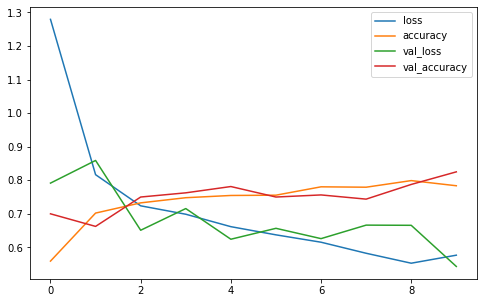

In [33]:
pd.DataFrame(history2.history).plot(figsize=(8,5))
plt.show()

In [34]:
model.save('./model_from_VGG16.h5')

In [35]:
#use ResNet50 pre-trained model
def create_model_from_ResNet50():
   
    model = ResNet50(weights = "imagenet", include_top=False, input_shape = (224,224, 3))
    
    # don't train existing weights
    for layer in model.layers:
      layer.trainable = False

    #Adding custom Dense Layers 
    x = model.output
    x = keras.layers.Flatten()(x)
    #x = keras.layers.Dense(128, activation="relu")(x)
    #x = keras.layers.Dropout(0.5)(x)
    #x = keras.layers.Dense(512, activation="relu")(x)
    x = keras.layers.Dropout(0.5)(x)
    x = keras.layers.Dense(256, activation="relu")(x)
    predictions = keras.layers.Dense(5, activation="softmax")(x)
    
    # creating the final model 
    final_model = keras.models.Model(inputs = model.input, outputs = predictions)
    
    final_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
    
    return final_model

create_model_from_ResNet50().summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [36]:
epochs = 10
start = time.time()

model_resNet50 = create_model_from_ResNet50()
history3 = model_resNet50.fit(train_generator,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=5,
                    verbose=2
                     )

end = time.time()
duration = end - start
print ('\n model from trained from ResNet50 took %0.2f seconds (%0.1f minutes) to train for %d epochs'%(duration, duration/60, epochs) )

Epoch 1/10
108/108 - 64s - loss: 4.5699 - accuracy: 0.2735 - val_loss: 2.2302 - val_accuracy: 0.3375
Epoch 2/10
108/108 - 57s - loss: 1.9196 - accuracy: 0.3085 - val_loss: 1.4856 - val_accuracy: 0.4062
Epoch 3/10
108/108 - 57s - loss: 2.0084 - accuracy: 0.2969 - val_loss: 1.4211 - val_accuracy: 0.4563
Epoch 4/10
108/108 - 57s - loss: 1.6337 - accuracy: 0.3401 - val_loss: 1.4576 - val_accuracy: 0.4313
Epoch 5/10
108/108 - 57s - loss: 1.5944 - accuracy: 0.3468 - val_loss: 1.4583 - val_accuracy: 0.3875
Epoch 6/10
108/108 - 56s - loss: 1.5239 - accuracy: 0.3462 - val_loss: 1.3668 - val_accuracy: 0.4500
Epoch 7/10
108/108 - 57s - loss: 1.5435 - accuracy: 0.3499 - val_loss: 1.3309 - val_accuracy: 0.4688
Epoch 8/10
108/108 - 56s - loss: 1.4826 - accuracy: 0.3667 - val_loss: 1.4816 - val_accuracy: 0.3562
Epoch 9/10
108/108 - 56s - loss: 1.4665 - accuracy: 0.3882 - val_loss: 1.4338 - val_accuracy: 0.4062
Epoch 10/10
108/108 - 56s - loss: 1.4796 - accuracy: 0.3725 - val_loss: 1.3873 - val_accura

In [37]:
model_resNet50.evaluate(test_generator)

14/14 [==============================] - 4s 290ms/step - loss: 1.3885 - accuracy: 0.4322


[1.3884563446044922, 0.4321839213371277]

In [38]:
#using preprocess function of pretarined model so that model is not overfitted and trained properly
training_datagen = ImageDataGenerator(preprocessing_function=preprocess_input_mobilenetv2)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input_mobilenetv2)

train_generator = training_datagen.flow_from_directory(
    training_dir,
    target_size = (224,224),
    class_mode = 'categorical',
    batch_size = 32
)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (224,224),
    class_mode = 'categorical',
    batch_size = 32
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224,224),
    class_mode = 'categorical',
    batch_size = 32
)

Found 3452 images belonging to 5 classes.
Found 430 images belonging to 5 classes.
Found 435 images belonging to 5 classes.


In [39]:
#use Rmobilenetv2 pre-trained model
def create_model_from_mobilenetv2():
   
    model = MobileNetV2(weights = "imagenet", include_top=False, input_shape = (224,224, 3))
    
    # don't train existing weights
    for layer in model.layers:
      layer.trainable = False

    #Adding custom Dense Layers 
    x = model.output
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(128, activation="relu")(x)
    x = keras.layers.Dropout(0.5)(x)
    x = keras.layers.Dense(512, activation="relu")(x)
    predictions = keras.layers.Dense(5, activation="softmax")(x)
    
    # creating the final model 
    final_model = keras.models.Model(inputs = model.input, outputs = predictions)
    final_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
    
    return final_model

create_model_from_mobilenetv2().summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_5[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

In [40]:
epochs = 10
start = time.time()

model_mobilenetV2 = create_model_from_mobilenetv2()
history4 = model_mobilenetV2.fit(train_generator,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=5,
                    verbose=2
                     )

end = time.time()
duration = end - start
print ('\n model from trained from MobileNetV2 took %0.2f seconds (%0.1f minutes) to train for %d epochs'%(duration, duration/60, epochs) )

Epoch 1/10
108/108 - 19s - loss: 1.1932 - accuracy: 0.6596 - val_loss: 0.5909 - val_accuracy: 0.7875
Epoch 2/10
108/108 - 14s - loss: 0.7143 - accuracy: 0.7662 - val_loss: 0.5870 - val_accuracy: 0.8500
Epoch 3/10
108/108 - 14s - loss: 0.6939 - accuracy: 0.7711 - val_loss: 0.6539 - val_accuracy: 0.7750
Epoch 4/10
108/108 - 14s - loss: 0.6596 - accuracy: 0.7813 - val_loss: 0.7788 - val_accuracy: 0.7688
Epoch 5/10
108/108 - 14s - loss: 0.6102 - accuracy: 0.8097 - val_loss: 0.5952 - val_accuracy: 0.8250
Epoch 6/10
108/108 - 14s - loss: 0.5850 - accuracy: 0.8271 - val_loss: 0.5923 - val_accuracy: 0.8625
Epoch 7/10
108/108 - 14s - loss: 0.5148 - accuracy: 0.8279 - val_loss: 0.7431 - val_accuracy: 0.7812
Epoch 8/10
108/108 - 14s - loss: 0.4680 - accuracy: 0.8337 - val_loss: 0.5543 - val_accuracy: 0.7937
Epoch 9/10
108/108 - 14s - loss: 0.4106 - accuracy: 0.8473 - val_loss: 0.6389 - val_accuracy: 0.8313
Epoch 10/10
108/108 - 14s - loss: 0.4187 - accuracy: 0.8404 - val_loss: 0.6906 - val_accura

In [41]:
model_mobilenetV2.evaluate(test_generator)

14/14 [==============================] - 2s 156ms/step - loss: 0.5847 - accuracy: 0.8598


[0.5846737623214722, 0.8597701191902161]

In [42]:
#Test model by uploading random images and check results

In [43]:
!pip install -q gradio

In [44]:
import gradio as gr 
import tensorflow as tf
import numpy as np
import requests
from keras.preprocessing import image

In [47]:
#used model trained using vgg16 as it performed well on both train and test data
labels = ['Daisy','Dadelion','Rose','Sunflower','Tulip'] #classes

def classify_image(inp):
  img = inp.reshape((-1,224,224,3)) #reshape input image
  prediction = model_from_vgg16.predict(img).flatten() #prediction
  return {labels[i]: float(prediction[i]) for i in range(5)} #return classes

image = gr.inputs.Image(shape=(224, 224))
label = gr.outputs.Label(num_top_classes=1)

gr.Interface(fn=classify_image, inputs=image, outputs=label, capture_session=True).launch(debug=False,share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://24750.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7862/',
 'https://24750.gradio.app')